In [1]:
'''Word Cloud visual image analysis of almost half a million tweets from october regarding the 2020 elections'''

'Word Cloud visual image analysis of almost half a million tweets from october regarding the 2020 elections'

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m216126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\october'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [4]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [5]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames,ignore_index=True)

In [6]:
tweet_dataset.shape 

(458048, 5)

In [8]:
tweet_dataset.tail()

,Date,id,tweet,tweet_info,metadata
458043,2020-10-09 19:59:38,1314656788881440769,b'RT @RAICESTEXAS: The Trump administration en...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458044,2020-10-09 19:59:38,1314656788877381632,"b'RT @RudyGiuliani: Joe Biden: ""You\xe2\x80\x9...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458045,2020-10-09 19:59:38,1314656788877377536,"b'@mlow29 No idea, but the hope was by the end...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458046,2020-10-09 19:59:38,1314656788856352768,b'RT @AdamWollner: The Biden campaign is curre...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458047,2020-10-09 19:59:38,1314656788839620611,"b""@ProjectLincoln Has anyone checked Trump's a...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [10]:
#Cleaning Tweets

corpus = []
for i in range(0, int(tweet_dataset.shape[0])):
    try:
        tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['tweet'][i])
        tweet = re.sub("b'", '', tweet)
        tweet = re.sub('https', '', tweet)
        tweet = tweet.split()

        for j in range(len(tweet)):
            if len(tweet[j]) <= 3:
                tweet[j] = ''
            elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                tweet[j] = ''
        tweet = ' '.join(tweet)
        corpus.append(tweet)
    except:
        continue

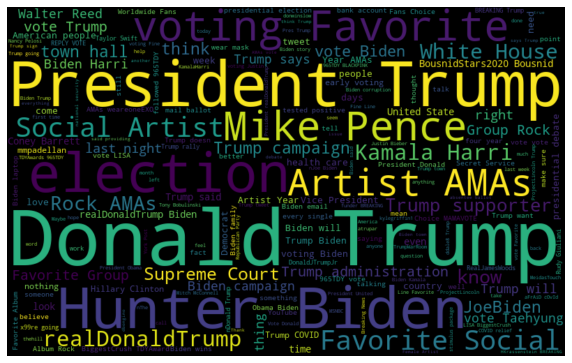

In [11]:
#Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()